In [19]:
##Estimación de indicadores de seguridad
#Se borra todo lo que se encuentra en el entorno

rm(list=ls())

# Librerías ====
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse,lubridate, showtext,srvyr,foreign)
font_add_google("Poppins", "pop")
showtext_auto()
remotes::install_github("cpyp-ipdp/funcionespgd", force = TRUE)
library(funcionespgd)

Using GitHub PAT from the git credential store.




rlang (1.1.4 -> 1.1.6) [CRAN]
glue  (1.7.0 -> 1.8.0) [CRAN]
cli   (3.6.3 -> 3.6.5) [CRAN]


Installing 3 packages: rlang, glue, cli

Installing packages into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\rlang\libs\x64\rlang.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\glue\libs\x64\glue.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\glue\libs\x64\glue.dll: Permission denied"
Warning message:
"restored 'glue'"


package 'cli' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cli'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\cli\libs\x64\cli.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\cli\libs\x64\cli.dll: Permission denied"
Warning message:
"restored 'cli'"



The downloaded binary packages are in
	C:\Users\claud\AppData\Local\Temp\Rtmp2RBRem\downloaded_packages
── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file 'C:\Users\claud\AppData\Local\Temp\Rtmp2RBRem\remotes37342d8b1a55\cpyp-ipdp-funcionespgd-8b2a39e/DESCRIPTION' ... OK
* preparing 'funcionespgd':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted 'LazyData' from DESCRIPTION
* building 'funcionespgd_0.1.0.tar.gz'



Warning message:
"package 'funcionespgd' is in use and will not be installed"


In [ ]:
## Pobreza rezago educativo
pob_rez <- openxlsx::read.xlsx("educacion_ciencia/indica_sectei.xlsx", sheet = "p_pob_rezedu") %>%
    intervals(año_base= 2022, "valor", margen = 0.004)
pob_rez

,year,estimado,superior,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2022,23.90000,23.90000,23.90000
2,2023,23.37367,23.46716,23.28055
3,2024,22.85893,23.04217,22.67715
4,2025,22.35553,22.62487,22.08939
5,2026,21.86321,22.21513,21.51687
6,2027,21.38174,21.81281,20.95919
7,2028,20.91086,21.41777,20.41595
8,2029,20.45036,21.02989,19.88680
9,2030,20.00000,20.64903,19.37137


In [24]:
## 15 años y mas rezago educativo
pob_rez_15 <- openxlsx::read.xlsx("educacion_ciencia/indica_sectei.xlsx", sheet = "p_pob15mas_rezedu") %>%
    intervals(año_base= 2024, "valor", margen = 0.004)
pob_rez_15

,year,estimado,superior,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2024,17.000000,17.00000,17.000000
2,2025,16.649044,16.71564,16.582714
3,2026,16.305334,16.43604,16.175670
4,2027,15.968719,16.16111,15.778618
5,2028,15.639054,15.89078,15.391312
6,2029,15.316194,15.62498,15.013512
7,2030,15.000000,15.36362,14.644987
8,2031,14.576783,14.98986,14.175086
9,2032,14.165506,14.62520,13.720262


In [30]:
tasa_inicial<- openxlsx::read.xlsx("educacion_ciencia/indica_sectei.xlsx", sheet = "tasa_co_brut_edu_inicial") %>%
    intervals(año_base= 2023, "valor", margen = 0.004)
tasa_inicial

,year,estimado,superior,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2023,0.4500000,0.4500000,0.4500000
2,2024,0.5043750,0.5063925,0.5023656
3,2025,0.5653204,0.5698520,0.5608248
4,2026,0.6336300,0.6412640,0.6260869
5,2027,0.7101937,0.7216251,0.6989433
6,2028,0.7960088,0.8120568,0.7802779
7,2029,0.8921932,0.9138212,0.8710772
8,2030,1.0000000,1.0283382,0.9724427
9,2031,1.2457309,1.2861569,1.2065756


In [29]:
tasa_mediasup<- openxlsx::read.xlsx("educacion_ciencia/indica_sectei.xlsx", sheet = "tasa_co_brut_edu_mediasup") %>%
    intervals(año_base= 2023, "valor", margen = 0.004)
tasa_mediasup

,year,estimado,superior,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2023,117.3000,117.3000,117.3000
2,2024,117.5414,118.0115,117.0731
3,2025,117.7832,118.7274,116.8466
4,2026,118.0256,119.4476,116.6205
5,2027,118.2684,120.1721,116.3949
6,2028,118.5118,120.9011,116.1697
7,2029,118.7556,121.6344,115.9450
8,2030,119.0000,122.3723,115.7207
9,2031,119.3973,123.2720,115.6445


In [31]:
patentes<- openxlsx::read.xlsx("educacion_ciencia/indica_sectei.xlsx", sheet = "tasa_co_brut_edu_mediasup") %>%
    intervals(año_base= 2024, "valor", margen = 0.004)
patentes

,year,estimado,superior,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2023,117.3000,117.3000,117.3000
2,2024,117.5414,117.5414,117.5414
3,2025,117.7832,118.2544,117.3140
4,2026,118.0256,118.9717,117.0870
5,2027,118.2684,119.6933,116.8605
6,2028,118.5118,120.4194,116.6344
7,2029,118.7556,121.1498,116.4088
8,2030,119.0000,121.8847,116.1836
9,2031,119.3973,122.7808,116.1071


In [32]:
snii<- openxlsx::read.xlsx("educacion_ciencia/indica_sectei.xlsx", sheet = "p_inte_snii_acom_stem") %>%
    intervals(año_base= 2024, "valor", margen = 0.004)
snii

,year,estimado,superior,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2024,36.00000,36.00000,36.00000
2,2025,36.63775,36.78430,36.49178
3,2026,37.28679,37.58568,36.99028
4,2027,37.94733,38.40452,37.49558
5,2028,38.61958,39.24121,38.00779
6,2029,39.30373,40.09612,38.52700
7,2030,40.00000,40.96965,39.05330
8,2031,40.76980,41.92514,39.64629
9,2032,41.55440,42.90291,40.24828


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


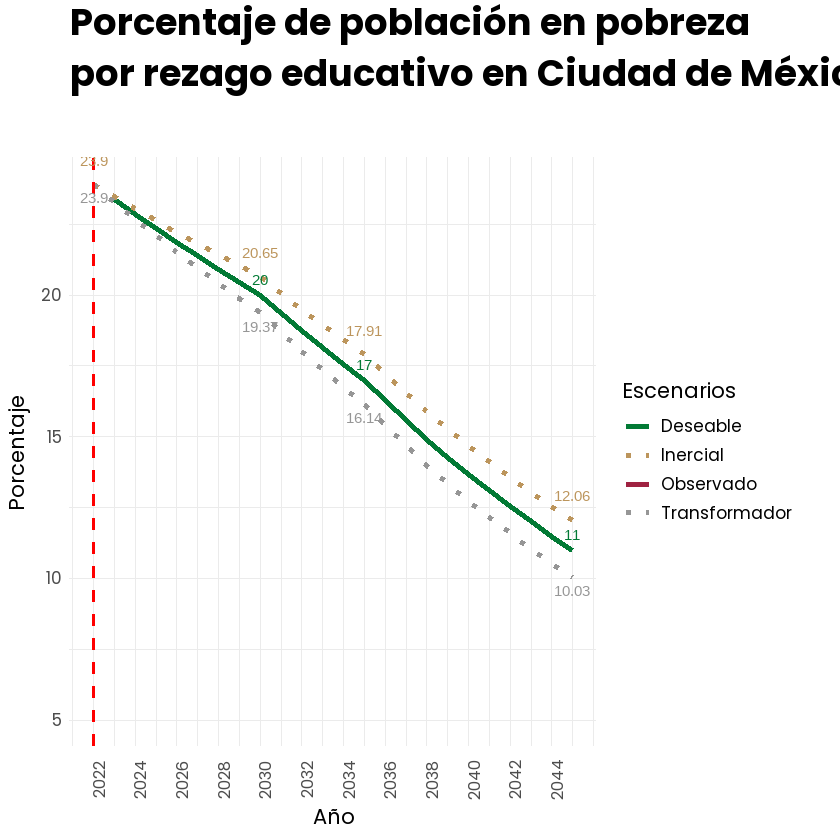

In [38]:
grafica_bonita(
  data = pob_rez,
  x = "year",
  y = "estimado",
  titulo = "Porcentaje de población en pobreza 
por rezago educativo en Ciudad de México
",
  linea_vertical = 2022,
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Inercial",
  nombre_intervalo_inferior = "Transformador",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 5
)

ggsave("educacion_ciencia/pobrezarezedu_estimada.png", width = 12, height = 10, dpi = 100, bg = "white")

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


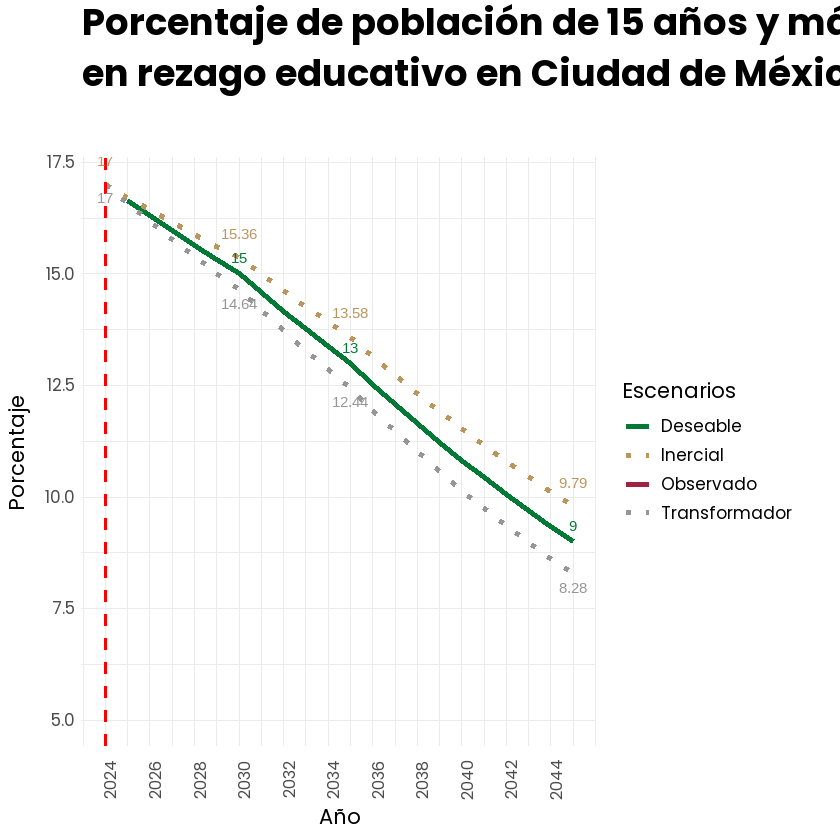

In [39]:
grafica_bonita(
  data = pob_rez_15,
  x = "year",
  y = "estimado",
  titulo = "Porcentaje de población de 15 años y más
en rezago educativo en Ciudad de México
",
  linea_vertical = 2024,
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Inercial",
  nombre_intervalo_inferior = "Transformador",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 5
)

ggsave("educacion_ciencia/pob_rez_edu15_estimada.png", width = 12, height = 10, dpi = 100, bg = "white")

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


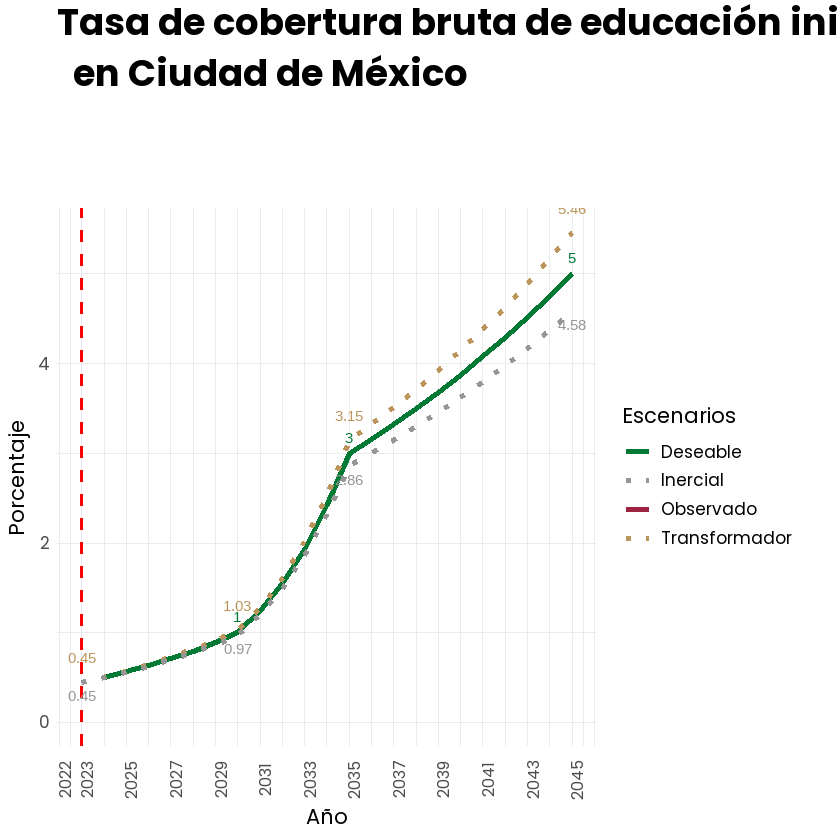

In [43]:
grafica_bonita(
  data = tasa_inicial,
  x = "year",
  y = "estimado",
  titulo = "Tasa de cobertura bruta de educación inicial
  en Ciudad de México

",
  linea_vertical = 2023,
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Transformador",
  nombre_intervalo_inferior = "Inercial",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 0
)

ggsave("educacion_ciencia/tasa_inicial_estimada.png", width = 12, height = 10, dpi = 100, bg = "white")

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


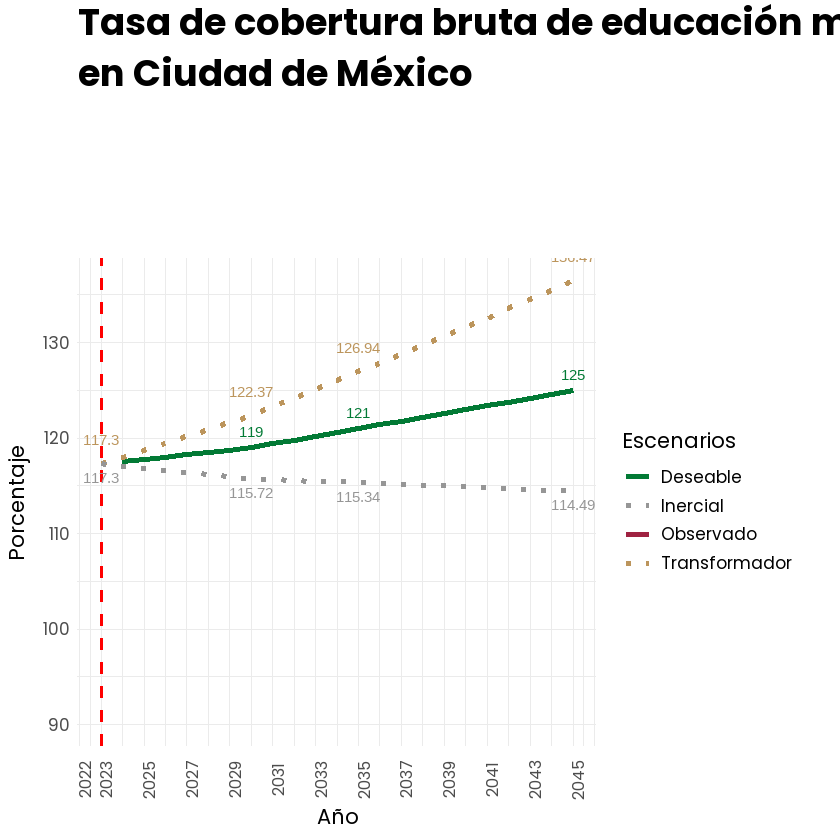

In [45]:
grafica_bonita(
  data = tasa_mediasup,
  x = "year",
  y = "estimado",
  titulo = "Tasa de cobertura bruta de educación media superior
en Ciudad de México


",
  linea_vertical = 2023,
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Transformador",
  nombre_intervalo_inferior = "Inercial",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 90
)

ggsave("educacion_ciencia/tasa_mediasup_estimada.png", width = 12, height = 10, dpi = 100, bg = "white")

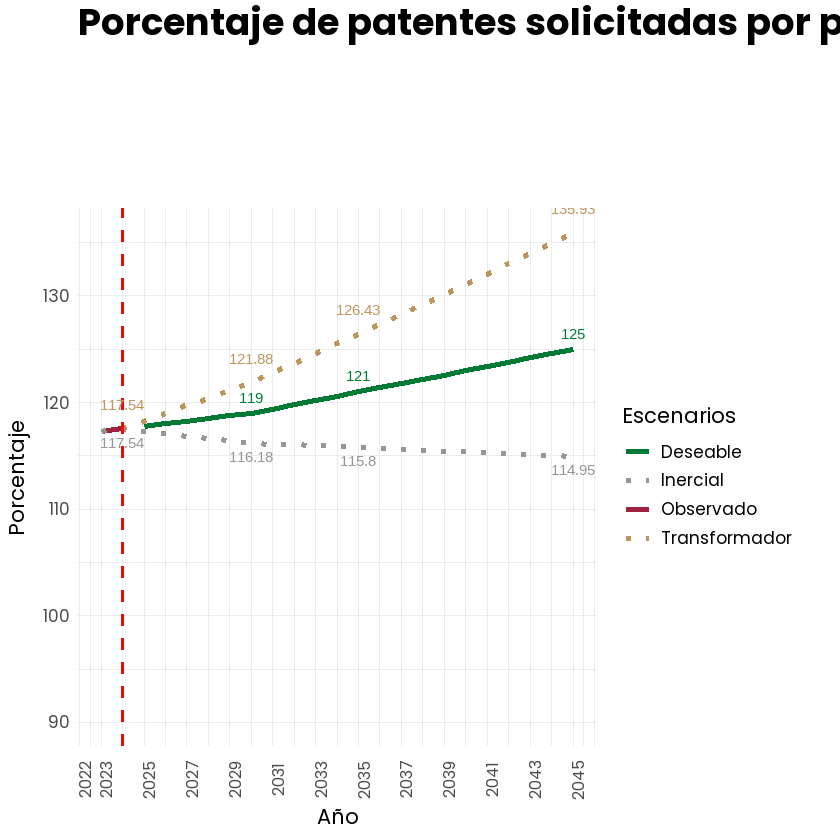

In [47]:
grafica_bonita(
  data = patentes,
  x = "year",
  y = "estimado",
  titulo = "Porcentaje de patentes solicitadas por personas mexicanas en Ciudad de México


",
  linea_vertical = 2024,
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Transformador",
  nombre_intervalo_inferior = "Inercial",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 90
)

ggsave("educacion_ciencia/patentes_estimada.png", width = 12, height = 10, dpi = 100, bg = "white")

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


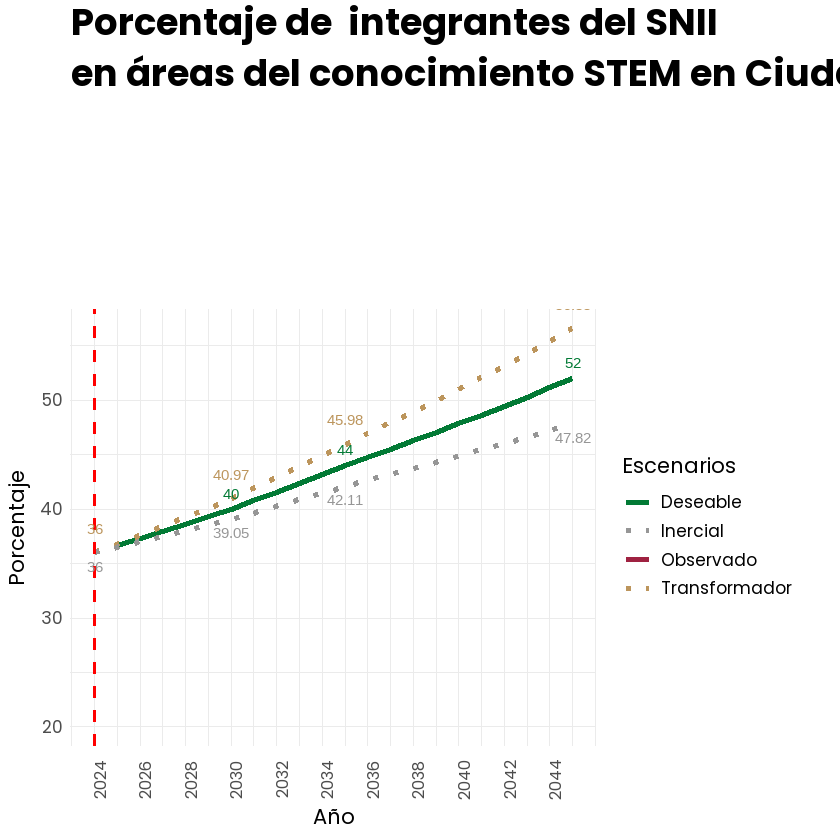

: 

In [ ]:
grafica_bonita(
  data = snii,
  x = "year",
  y = "estimado",
  titulo = "Porcentaje de  integrantes del SNII 
en áreas del conocimiento STEM en Ciudad de México



",
  linea_vertical = 2024,
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Transformador",
  nombre_intervalo_inferior = "Inercial",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 20
)

ggsave("educacion_ciencia/snii_estimada.png", width = 12, height = 10, dpi = 100, bg = "white")